In [1]:
import pandas as pd      # Magic for reading tables
import matplotlib.pyplot as plt  # Magic for drawing
import seaborn as sns    # More drawing magic


In [2]:
url = 'https://raw.githubusercontent.com/datasets/covid-19/master/data/countries-aggregated.csv'
df = pd.read_csv(url)
df.head()


,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-23,Afghanistan,0,0,0
2,2020-01-24,Afghanistan,0,0,0
3,2020-01-25,Afghanistan,0,0,0
4,2020-01-26,Afghanistan,0,0,0


In [3]:
df.info()  # Summary of columns
df.describe()  # Numbers summary
df.isnull().sum()  # Missing values
df.duplicated().sum()  # Check for duplicate rows



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161568 entries, 0 to 161567
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Date       161568 non-null  object
 1   Country    161568 non-null  object
 2   Confirmed  161568 non-null  int64 
 3   Recovered  161568 non-null  int64 
 4   Deaths     161568 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 6.2+ MB


np.int64(0)

In [4]:
df.drop_duplicates(inplace=True)
df.fillna(0, inplace=True)


In [5]:
df['Country'].nunique()


198

In [6]:
df.groupby('Country')['Confirmed'].sum().sort_values(ascending=False).head(10)


,Confirmed
Country,
US,22963151317
India,14681429726
Brazil,9991736059
France,4588778075
United Kingdom,4376490715
Russia,4055403879
Turkey,3505368946
Germany,3007332317
Italy,2914673720


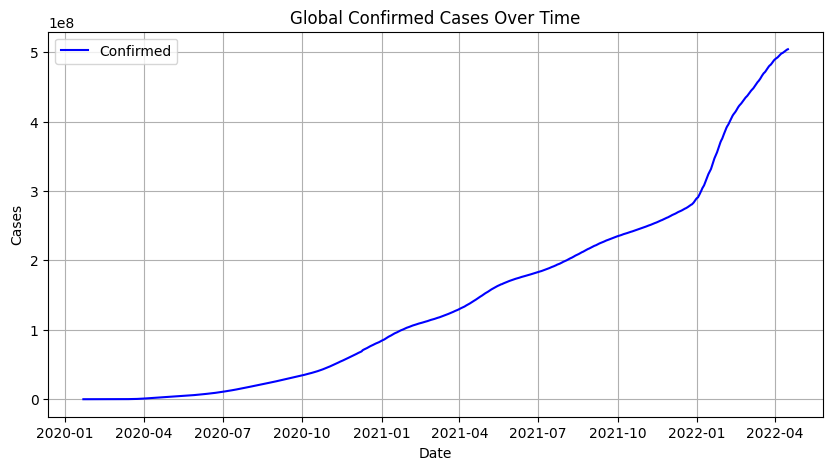

In [7]:
df['Date'] = pd.to_datetime(df['Date'])
daily = df.groupby('Date')['Confirmed'].sum()

plt.figure(figsize=(10,5))
plt.plot(daily, label='Confirmed', color='blue')
plt.title('Global Confirmed Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Cases')
plt.grid()
plt.legend()
plt.show()


/tmp/ipython-input-8-2015039567.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_deaths.values, y=top_deaths.index, palette='Reds')


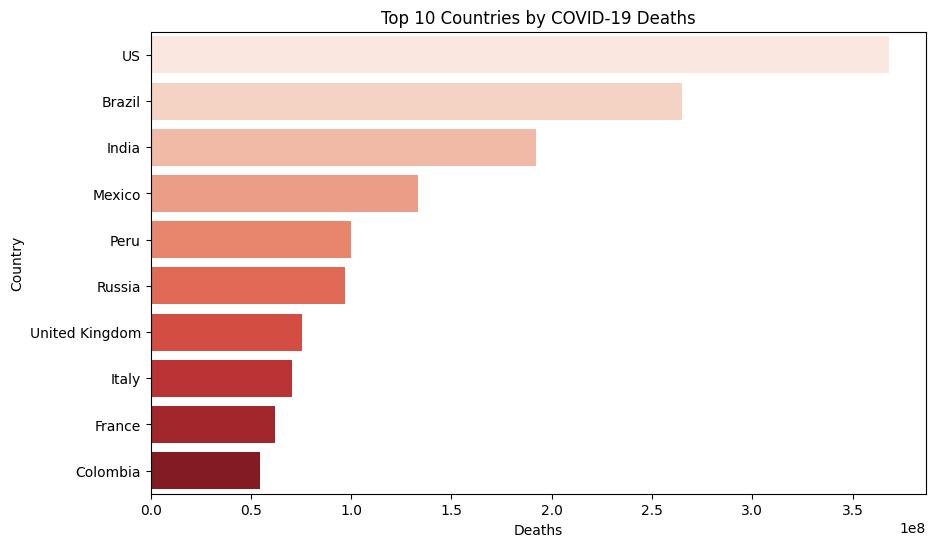

In [8]:
top_deaths = df.groupby('Country')['Deaths'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_deaths.values, y=top_deaths.index, palette='Reds')
plt.title('Top 10 Countries by COVID-19 Deaths')
plt.xlabel('Deaths')
plt.ylabel('Country')
plt.show()


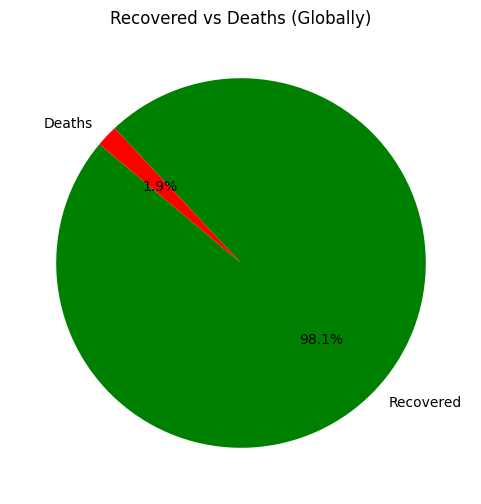

In [9]:
total_deaths = df['Deaths'].sum()
total_confirmed = df['Confirmed'].sum()
total_recovered = total_confirmed - total_deaths

plt.figure(figsize=(6,6))
plt.pie([total_recovered, total_deaths], labels=['Recovered', 'Deaths'],
        autopct='%1.1f%%', colors=['green', 'red'], startangle=140)
plt.title('Recovered vs Deaths (Globally)')
plt.show()


📌 "More cases were confirmed in April and May 2020."
📌 "USA has the highest number of deaths."
📌 "Recovered cases are higher than death count globally."
